# Cálculo de Métricas de Evaluación para Clasificación:

## Ejemplo/Ejercicio:

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo usando regresion logistica
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación o sensibilidad (recall):", recall)
print("Puntuación o medida F1 (F1-score):", f1)

Exactitud: 0.9722222222222222
Precisión: 0.9725599634194969
Recuperación o sensibilidad (recall): 0.9722222222222222
Puntuación o medida F1 (F1-score): 0.9722809227439473


### TAREA en clase/casa (reference - pumpkings homework):

Usando alguna herramienta de IA, consultar:

1. Qué es y cómo se obtiene la matriz de confusíón.
2. Analizar el resultado de la matriz de confusión del anterior ejemplo/ejercicio.
3. Obtener las formulas de TP, TN, FP, FN, precision, recall, F1-score, support.
4. Apartir de la matriz de confusión, interpretar los resultados del item 3.
5. Con base en lo anterior, calcular, graficar e interpretar: FPR, TPR, ROC, AUC.

Matriz de confusión (manual):
[[33  0]
 [ 0 28]]
TN: 33
TP: 28
FP: 0
FN: 0
accuracy (manual): 1.0
Precisión (manual): 1.0
Sensibilidad (manual): 1.0
Especificidad (manual): 1.0
F1-score (manual): 1.0
 AUC (manual): 0.0 
Matriz de confusión (sklearn):
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]
Clases únicas en y_test: [0 1 2 3 4 5 6 7 8 9]
Clases únicas en y_pred: [0 1 2 3 4 5 6 7 8 9]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00    

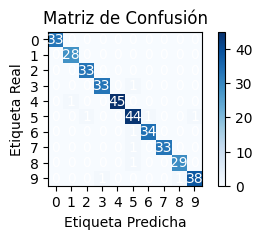


Cálculo utilizando librerias
TP: 28
TN: 33
FP: 0
FN: 0
Precisión (sklearn): 0.9722222222222222
Sensibilidad (sklearn): 0.9722222222222222
Especificidad (sklearn): 1.0


In [23]:
# Cálculo de la matriz de confusión

import numpy as np

# Calcular la matriz de confusión y extraer TP, TN, FP, FN de forma manual
# Verdaderos Positivos (TP), Verdaderos Negativos (TN),
# Falsos Positivos (FP) y Falsos Negativos (FN)

TP = 0
TN = 0
FP = 0
FN = 0

for yt, yp in zip(y_test, y_pred):
    if yt == 1 and yp == 1:
        TP += 1
    elif yt == 0 and yp == 0:
        TN += 1
    elif yt == 0 and yp == 1:
        FP += 1
    elif yt == 1 and yp == 0:
        FN += 1

# Crear matriz de confusión manual
confusion_matrix_manual = np.array([[TN, FP], [FN, TP]])

# Calcular accuracy, precisión, sensibilidad y especificidad de forma manual
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision_manual = TP / (TP + FP) if (TP + FP) > 0 else 0
sensibilidad_manual = TP / (TP + FN) if (TP + FN) > 0 else 0
especificidad_manual = TN / (TN + FP) if (TN + FP) > 0 else 0

# Calcular el F1-score de manera manual
f1_score_manual = 2 * (precision_manual * sensibilidad_manual) / (precision_manual + sensibilidad_manual) if (precision_manual + sensibilidad_manual) > 0 else 0

print("Matriz de confusión (manual):")
print(confusion_matrix_manual)
print("TN:", TN)
print("TP:", TP)
print("FP:", FP)
print("FN:", FN)
print("accuracy (manual):", accuracy)
print("Precisión (manual):", precision_manual)
print("Sensibilidad (manual):", sensibilidad_manual)
print("Especificidad (manual):", especificidad_manual)
print("F1-score (manual):", f1_score_manual)

#Calcular el Área Bajo la Curva (AUC) de la curva ROC de manera manual,
# Asumiendo que y_test son las etiquetas verdaderas y y_scores son las puntuaciones de predicción
# y_test = np.array([...])
# y_scores = np.array([...])

# Obtener las puntuaciones de predicción (probabilidades)
y_scores = model.predict_proba(X_test)[:, 1]  # Obtener las probabilidades de la clase positiva

# Asegurarse de que y_test y y_scores sean arrays de numpy
y_test = np.array(y_test)
y_scores = np.array(y_scores)

# Ordenar por las puntuaciones de predicción en orden descendente
sorted_indices = np.argsort(y_scores)[::-1]
y_test_sorted = y_test[sorted_indices]
y_scores_sorted = y_scores[sorted_indices]

# Calcular los valores TPR y FPR
#TPR (True Positive Rate)
#FPR (False Positive Rate),
TP = 0
FP = 0
FN = sum(y_test_sorted)  # todos los positivos verdaderos al inicio
TN = len(y_test_sorted) - FN  # todos los negativos verdaderos al inicio

TPR = []
FPR = []

for i in range(len(y_test_sorted)):
    if y_test_sorted[i] == 1:
        TP += 1
        FN -= 1
    else:
        FP += 1
        TN -= 1

    TPR.append(TP / (TP + FN) if (TP + FN) > 0 else 0)
    FPR.append(FP / (FP + TN) if (FP + TN) > 0 else 0)

TPR = np.array(TPR)
FPR = np.array(FPR)

# Calcular el área bajo la curva ROC usando la fórmula del trapecio
auc = np.trapz(TPR, FPR)

#print("TPR:", TPR)
#print("FPR:", FPR)
print("\033[1;35m","AUC (manual):", auc, "\033[0;30m")


# Matriz de confusión utilizando librerias
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Obtener matriz de confusión utilizando sklearn
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión para inspección
print("Matriz de confusión (sklearn):")
print(conf_matrix)

# Imprimir las clases únicas presentes en y_test
print("Clases únicas en y_test:", np.unique(y_test))

# Imprimir las clases únicas presentes en y_pred
print("Clases únicas en y_pred:", np.unique(y_pred))

# Calcular métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))  # Reducir el tamaño de la figura
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
for i in range(len(np.unique(y_test))):
    for j in range(len(np.unique(y_test))):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="white")
plt.show()

# Analizar casos de error
#error_indices = np.where(y_test != y_pred)[0]
#print("Índices de casos erróneos:", error_indices)

# Imprimir algunas instancias de error
#for idx in error_indices[:min(5, len(error_indices))]:
#    print("Instancia:", X_test[idx])
#    print("Etiqueta Real:", y_test[idx])
#    print("Etiqueta Predicha:", y_pred[idx])
#    print()

#num_classes = len(np.unique(y_test))
#print("Número de clases:", num_classes)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print()
print("Cálculo utilizando librerias")
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

# Calcular precisión, sensibilidad y especificidad utilizando sklearn
precision_sklearn = precision_score(y_test, y_pred, average='micro')
sensibilidad_sklearn = recall_score(y_test, y_pred, average='micro')  # Recall es lo mismo que sensibilidad
# Calcular especificidad utilizando sklearn
especificidad_sklearn = TN / (TN + FP) if (TN + FP) > 0 else 0

print("Precisión (sklearn):", precision_sklearn)
print("Sensibilidad (sklearn):", sensibilidad_sklearn)
print("Especificidad (sklearn):", especificidad_sklearn)


